## Load the data

### Subtask:
Load the loan prediction dataset from the specified path.


**Reasoning**:
I will import the pandas library and read the CSV file into a DataFrame, then display the first few rows to verify the data has been loaded correctly.



In [ ]:
import pandas as pd

df = pd.read_csv('Loan_default.csv')
display(df.head())

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Loan Date (DD/MM/YYYY)
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,10/15/2018
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,3/25/2016
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,11/11/2013
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,6/22/2017
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,6/9/2014


**Reasoning**:
The previous attempt to load the data failed because the file was not found at the specified path. I will now try to list the files in the `/mnt/data` directory to see if the file exists with a different name or path.



## Load the data

### Subtask:
Retry loading the data, as the previous attempt failed due to a `FileNotFoundError`.


**Reasoning**:
I will attempt to load the data from the specified path. Since the previous attempt failed, I will include a try-except block to handle the `FileNotFoundError` gracefully and provide a user-friendly message as requested.



In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LoanID                  255347 non-null  object 
 1   Age                     255347 non-null  int64  
 2   Income                  255347 non-null  int64  
 3   LoanAmount              255347 non-null  int64  
 4   CreditScore             255347 non-null  int64  
 5   MonthsEmployed          255347 non-null  int64  
 6   NumCreditLines          255347 non-null  int64  
 7   InterestRate            255347 non-null  float64
 8   LoanTerm                255347 non-null  int64  
 9   DTIRatio                255347 non-null  float64
 10  Education               255347 non-null  object 
 11  EmploymentType          255347 non-null  object 
 12  MaritalStatus           255347 non-null  object 
 13  HasMortgage             255347 non-null  object 
 14  HasDependents       

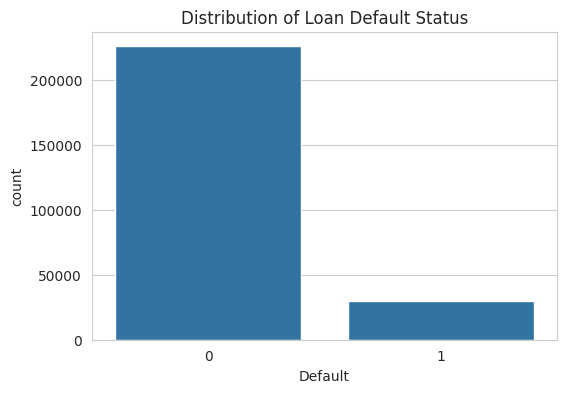

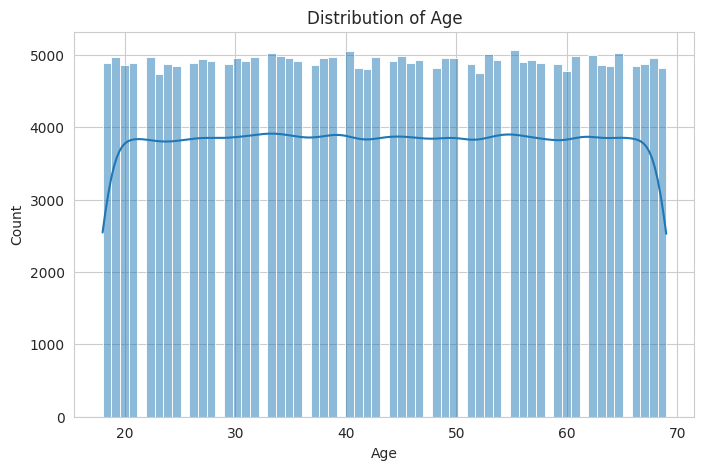

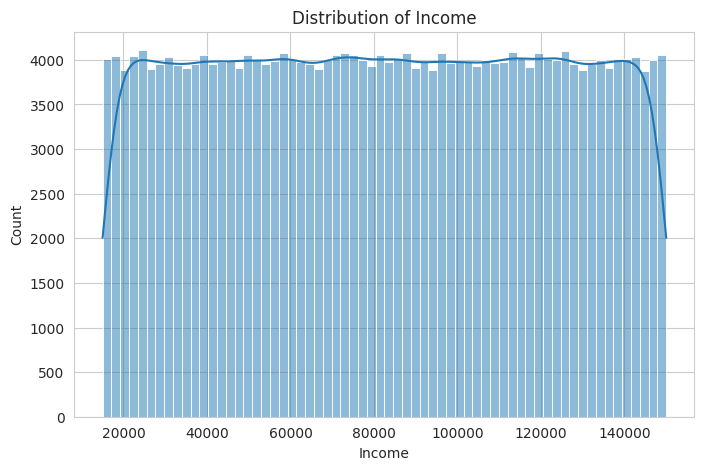

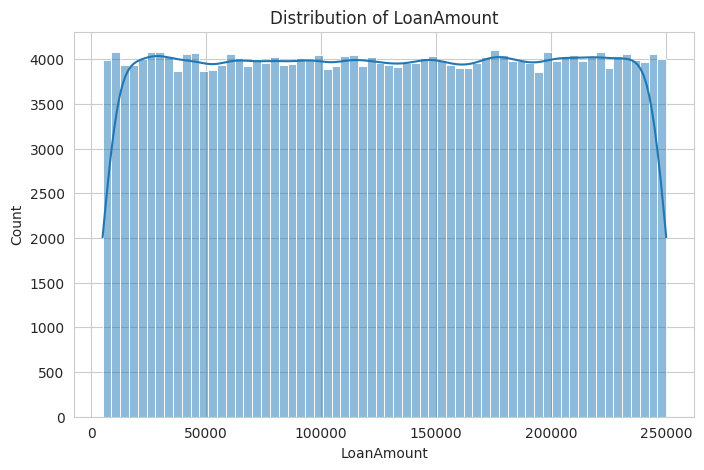

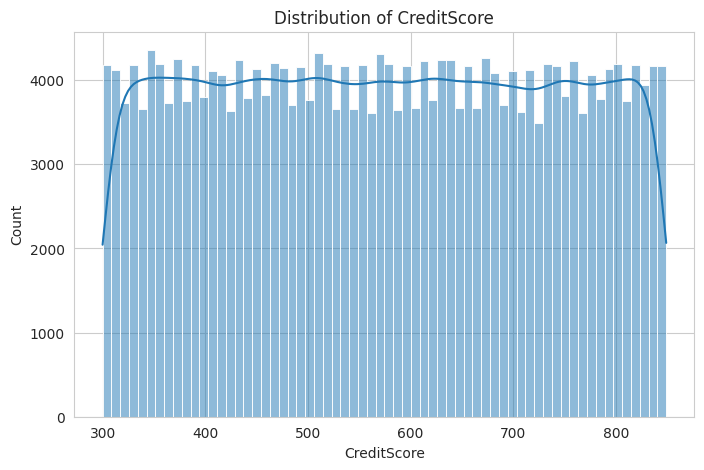

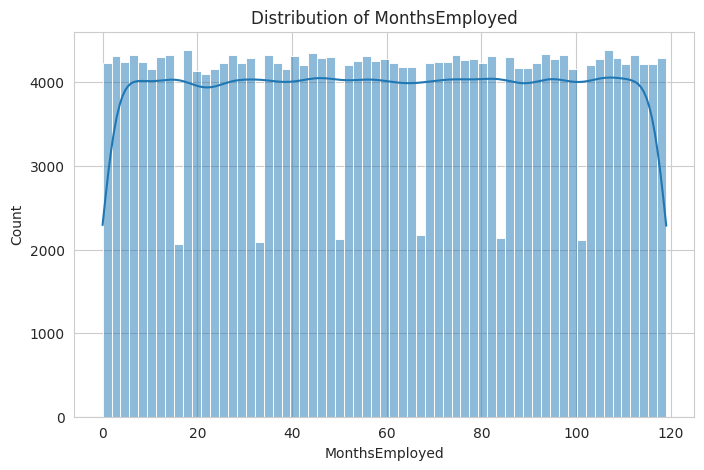

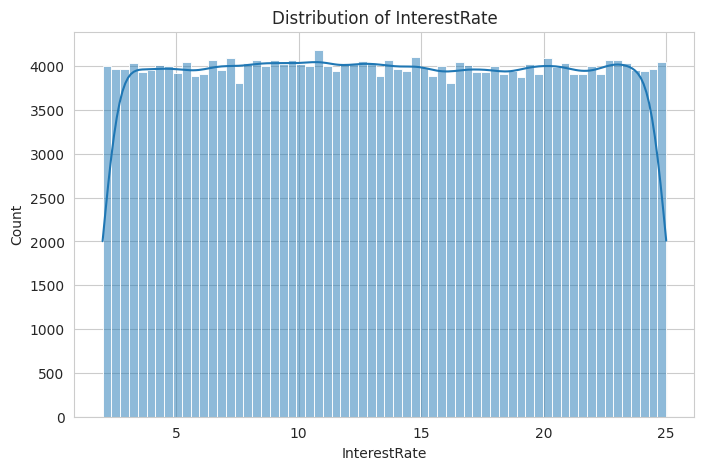

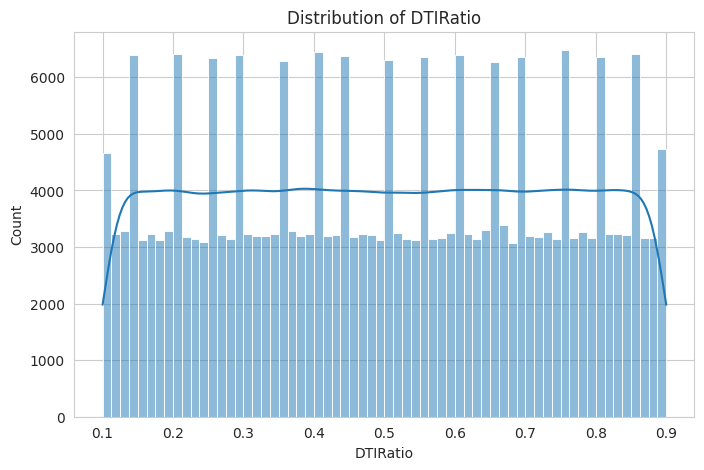

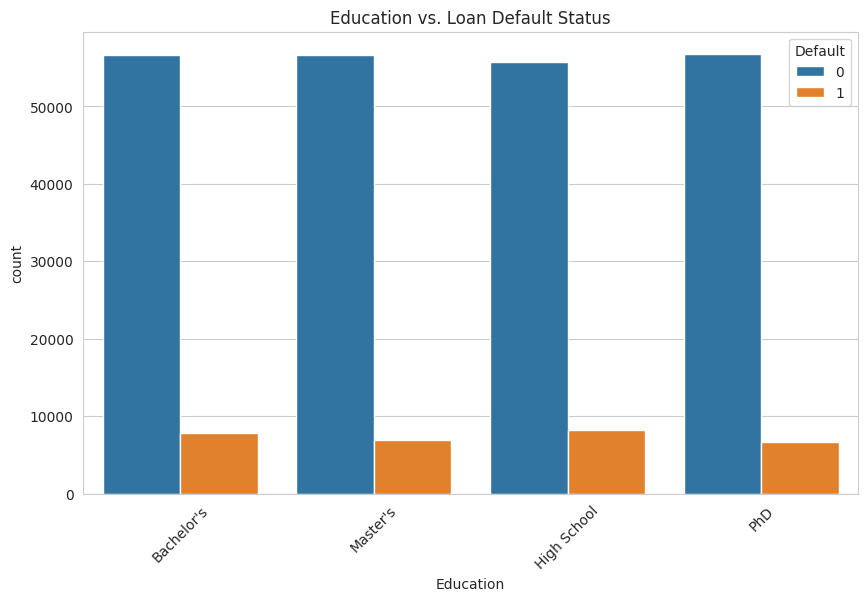

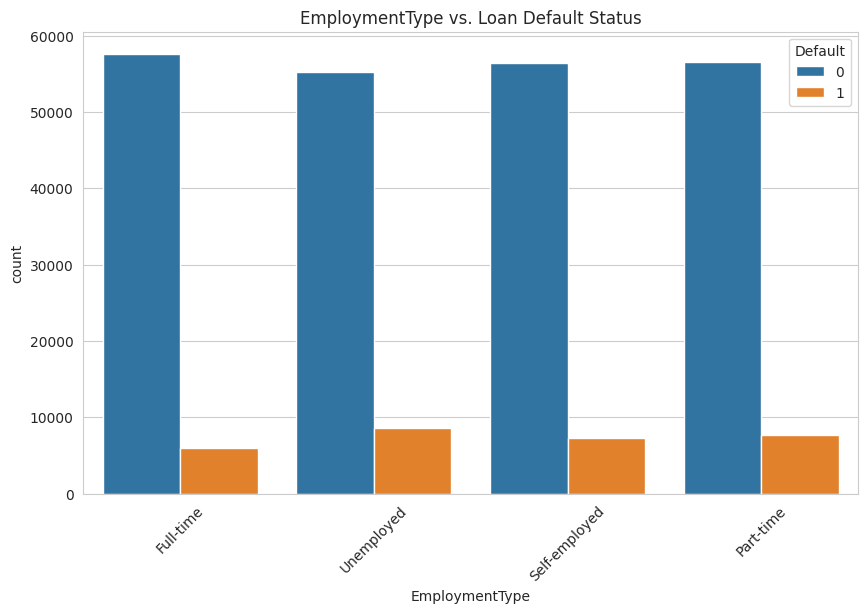

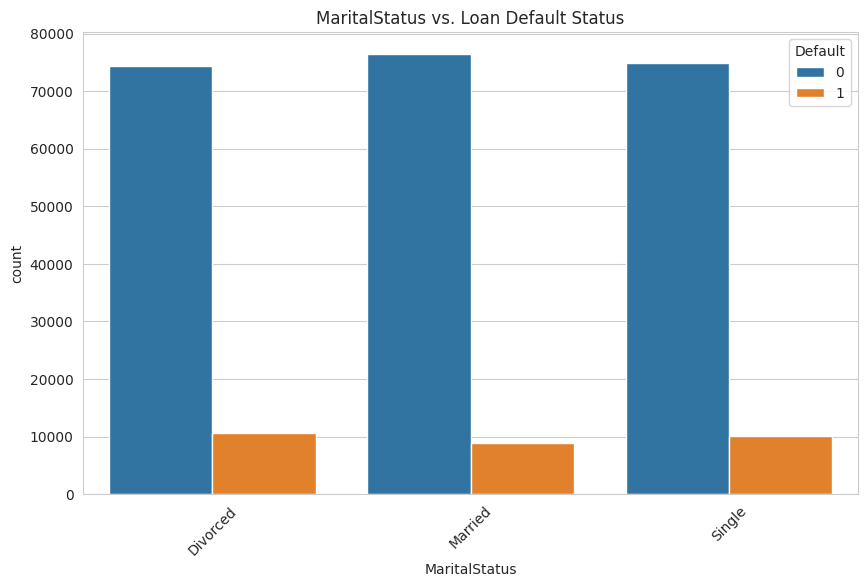

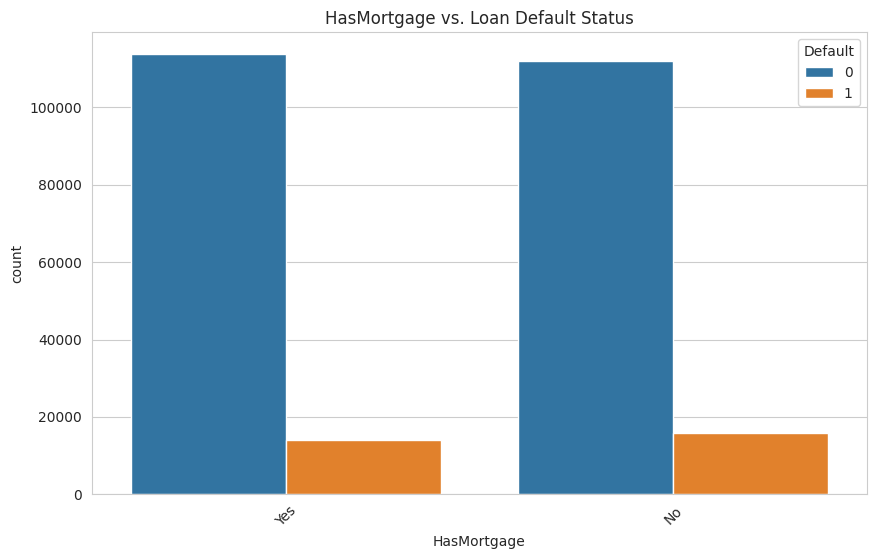

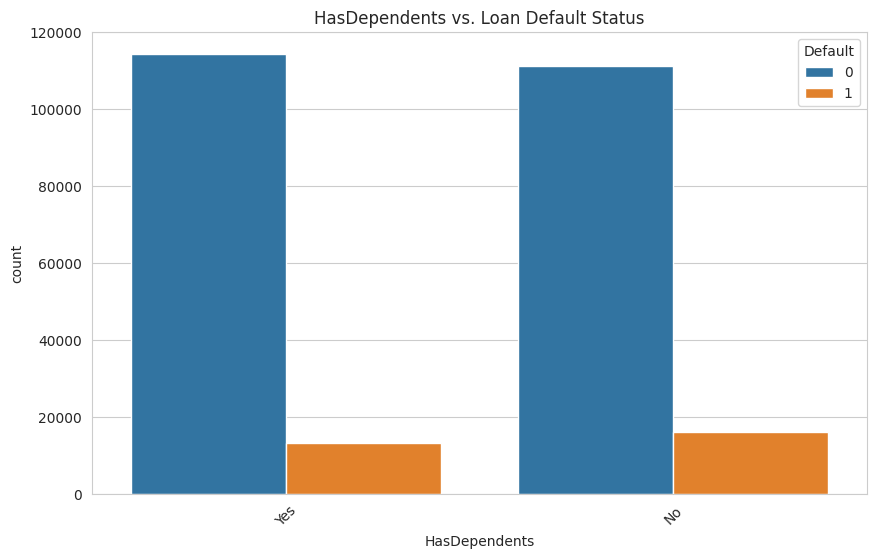

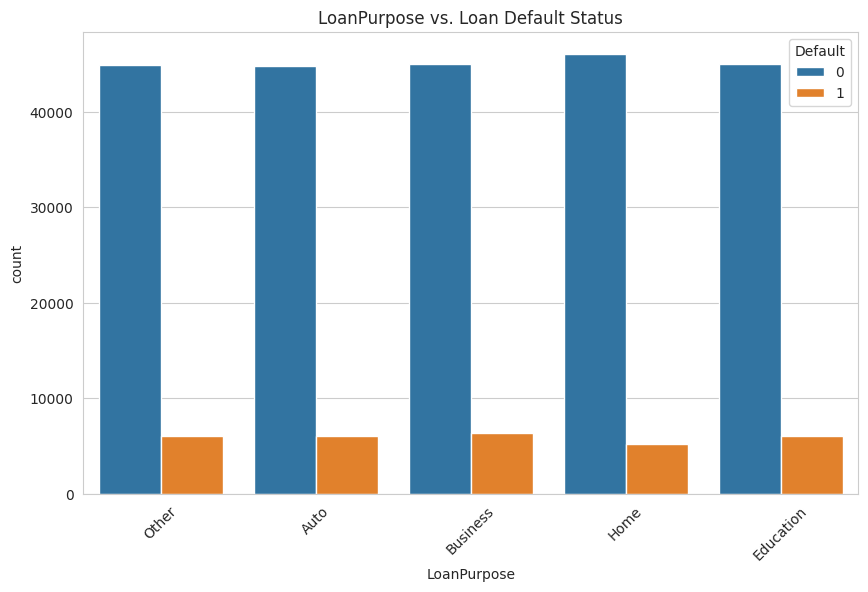

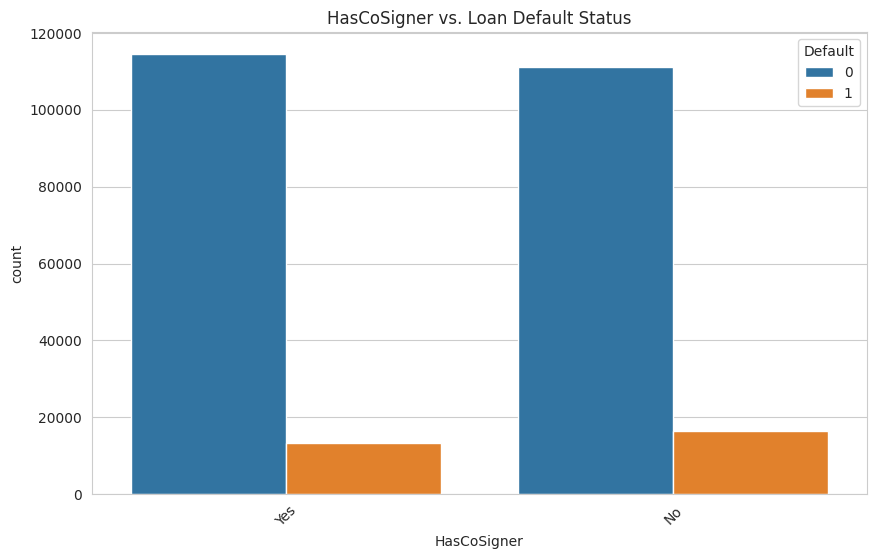

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=df)
plt.title('Distribution of Loan Default Status')
plt.show()

# Visualize the distribution of numerical features
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'DTIRatio']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Visualize the relationship between categorical features and the target variable
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Default', data=df)
    plt.title(f'{feature} vs. Loan Default Status')
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipython-input-5-3734385117.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Default', data=df, palette='viridis')


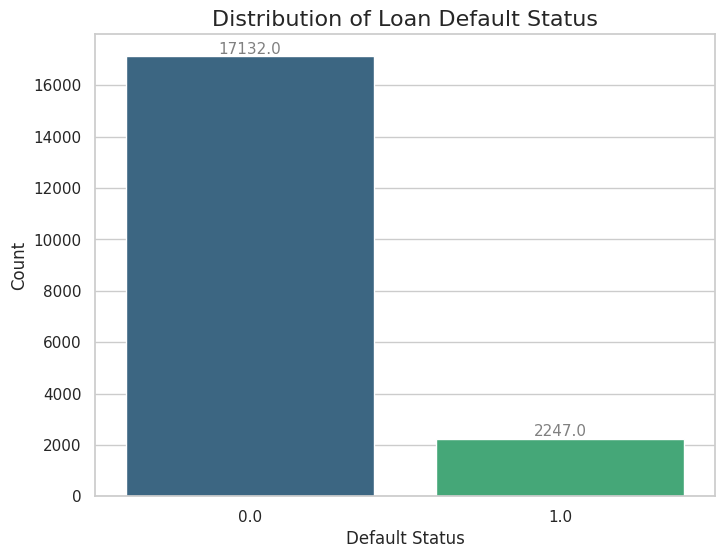

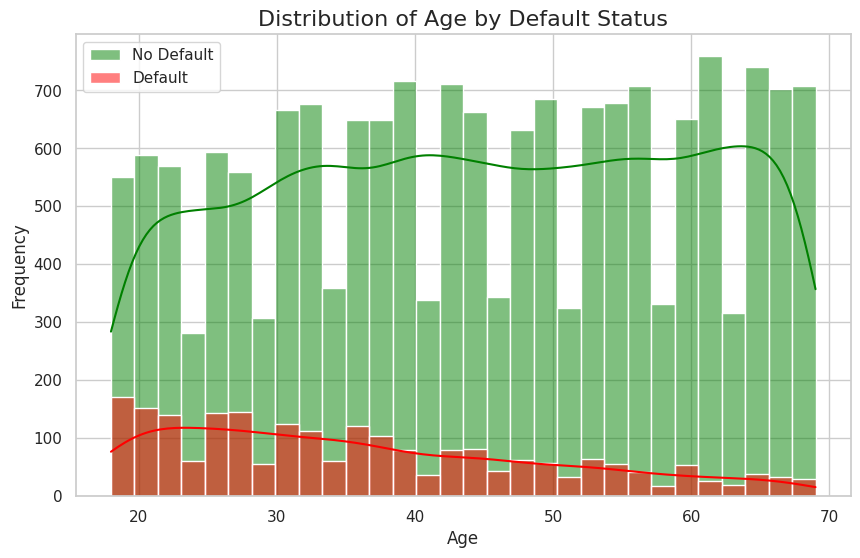

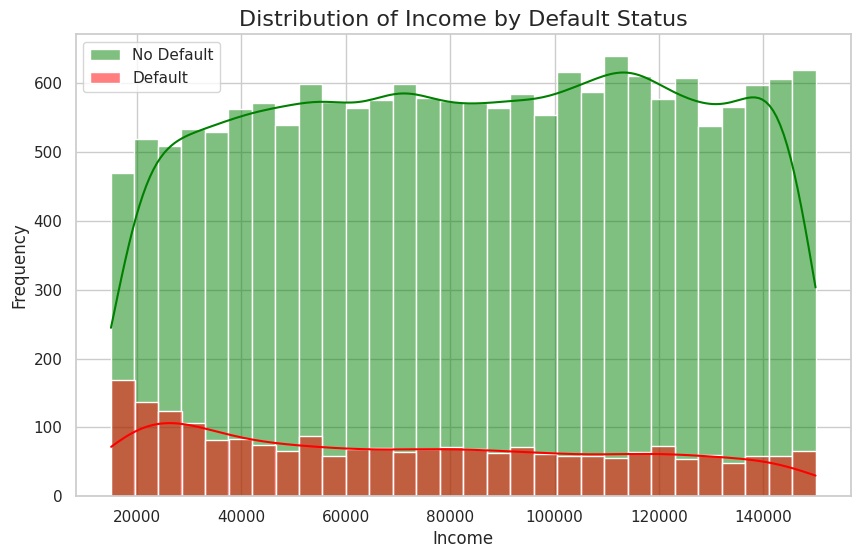

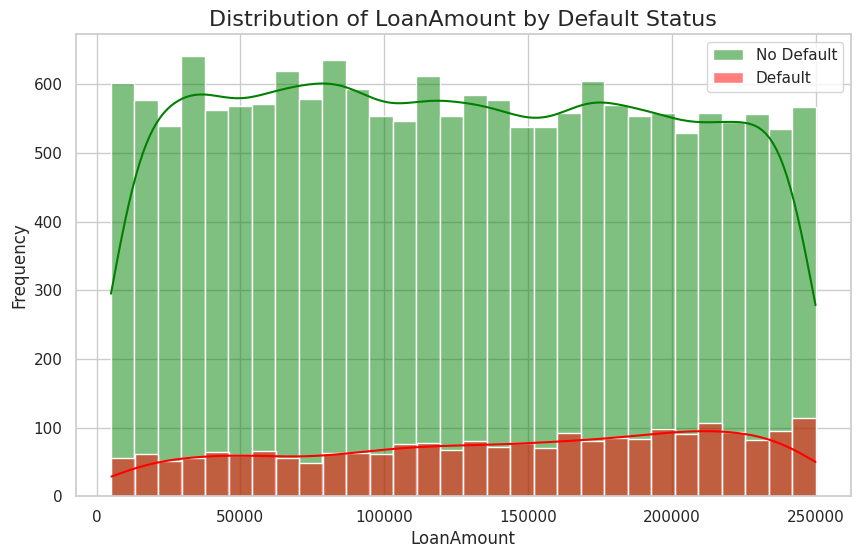

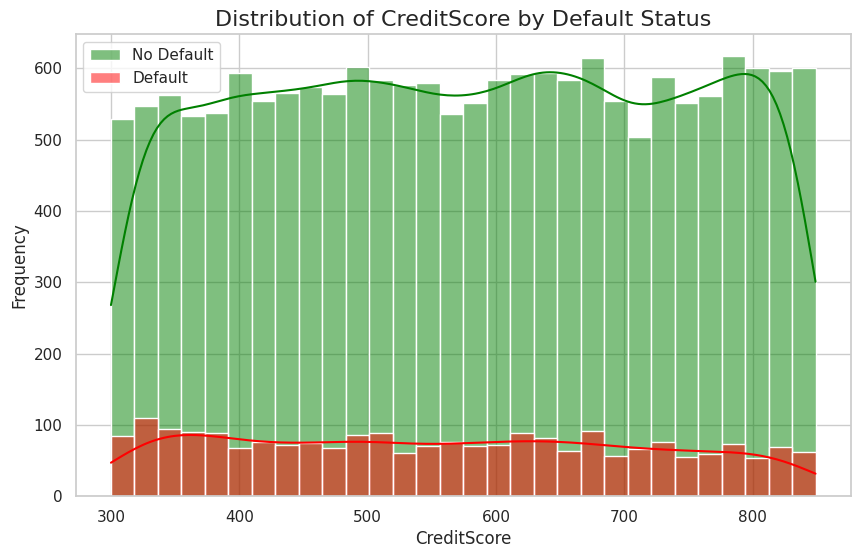

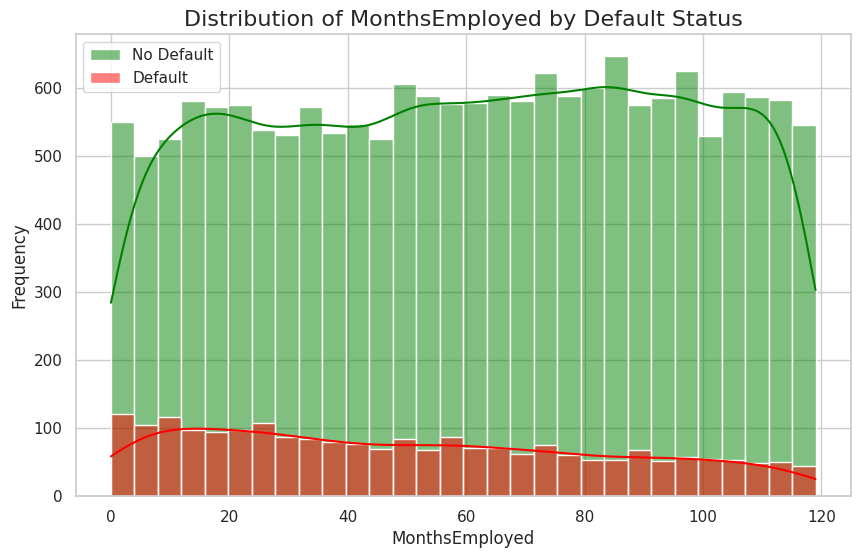

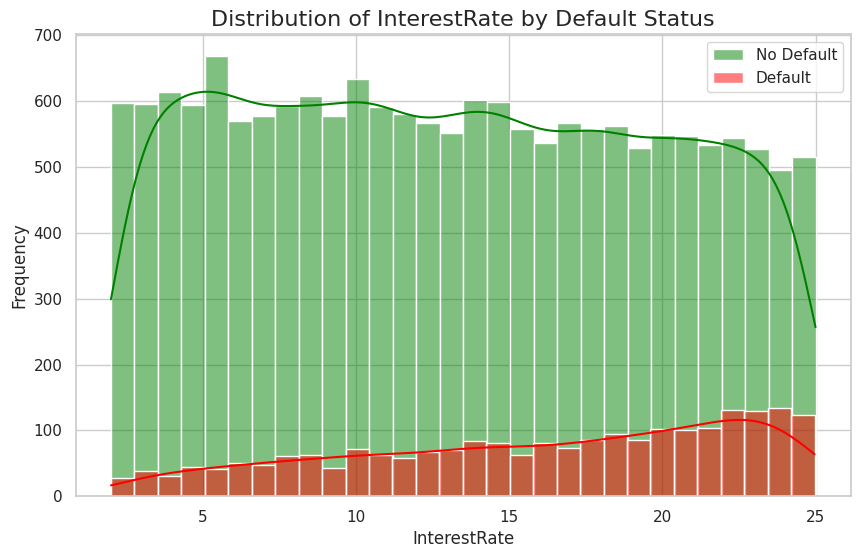

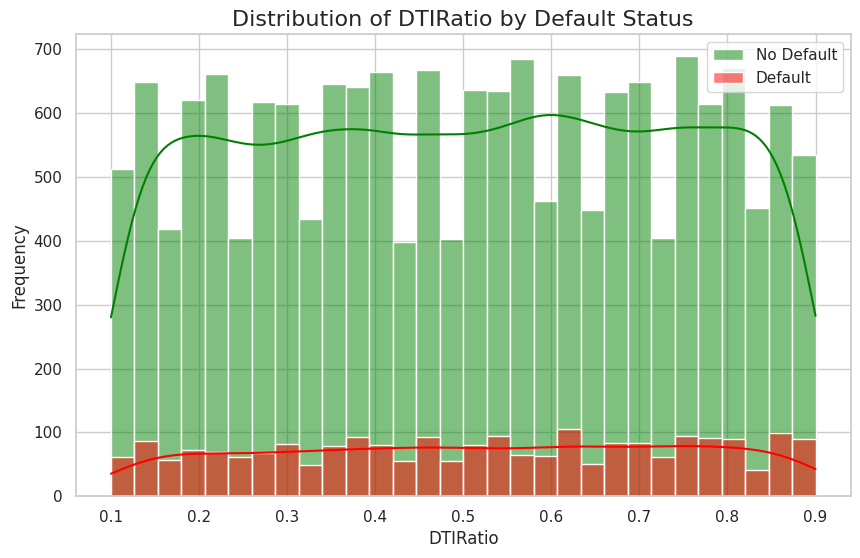

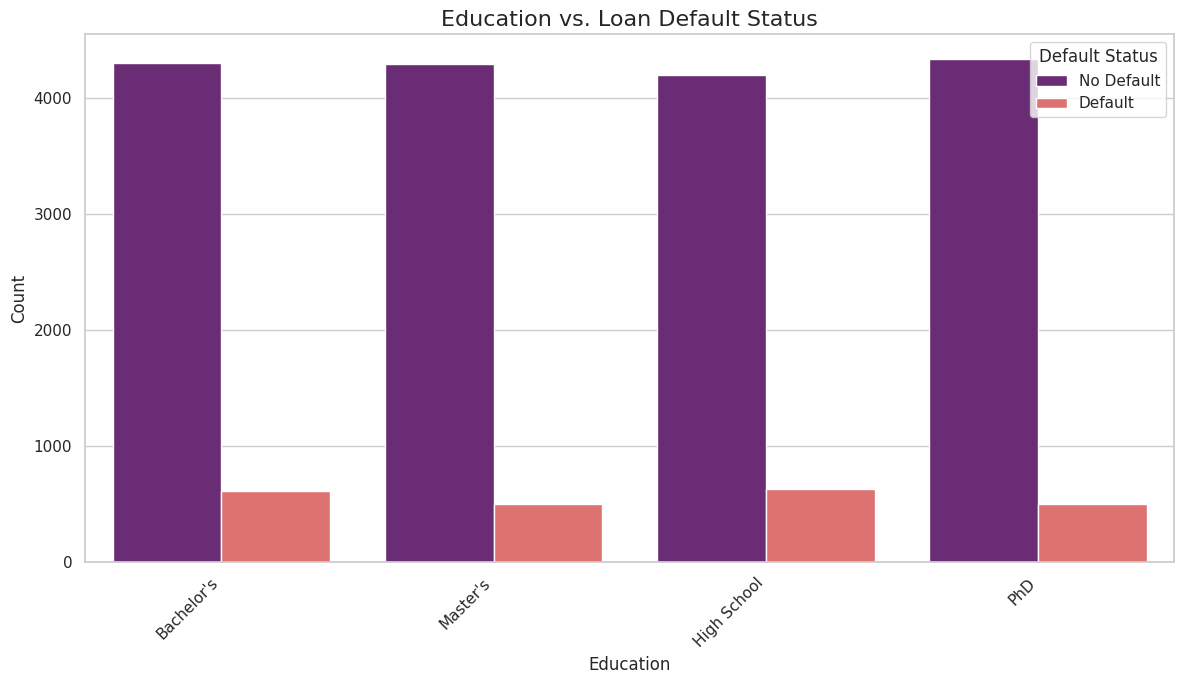

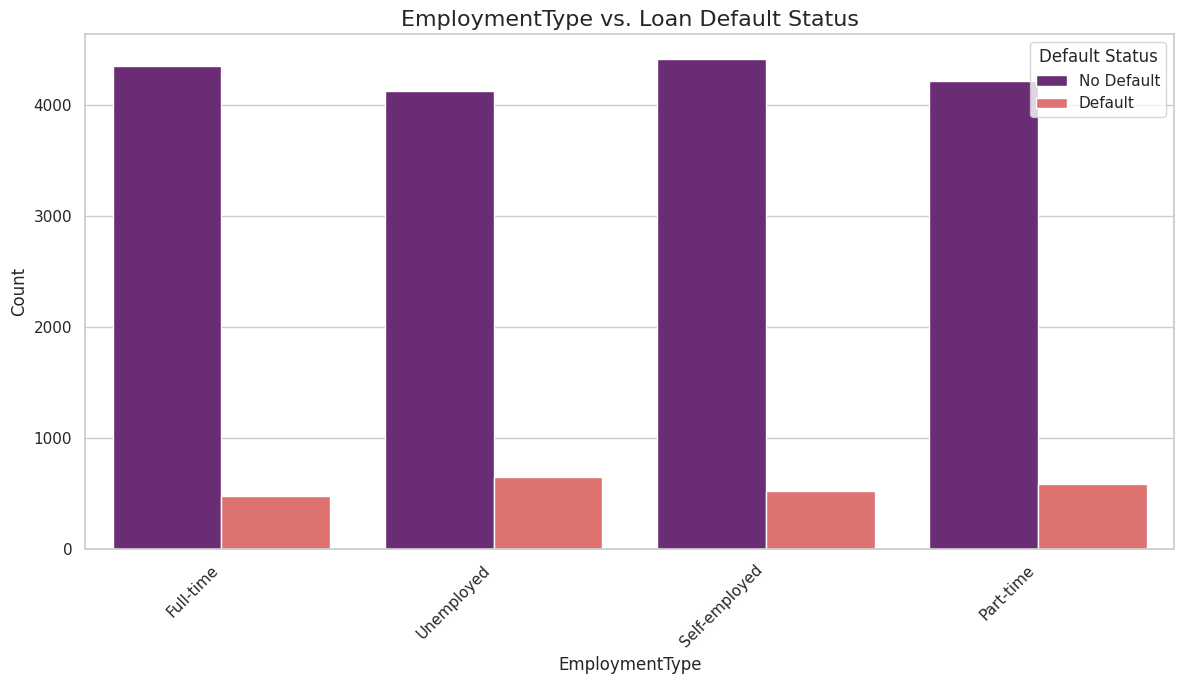

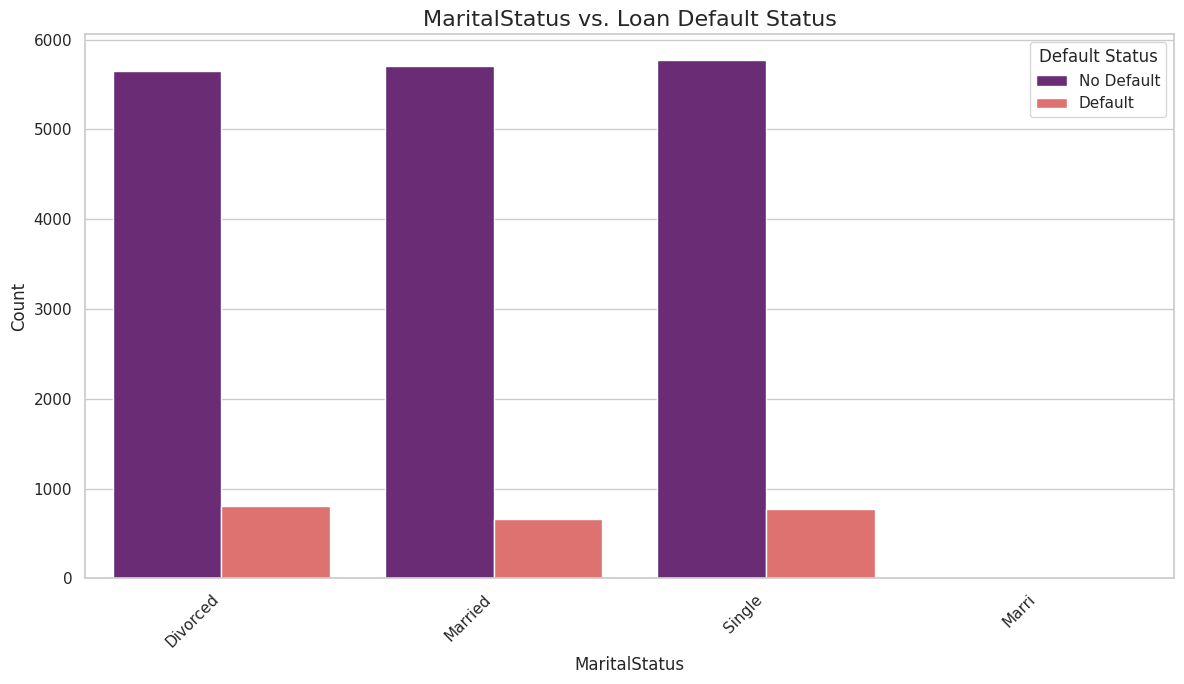

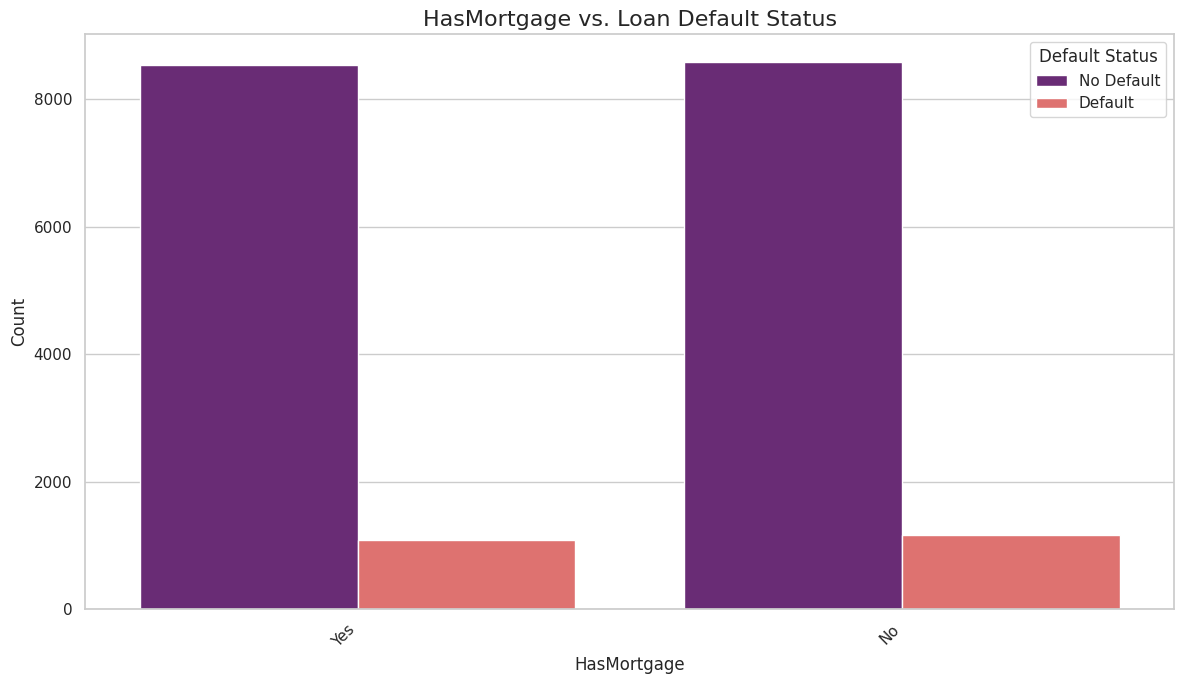

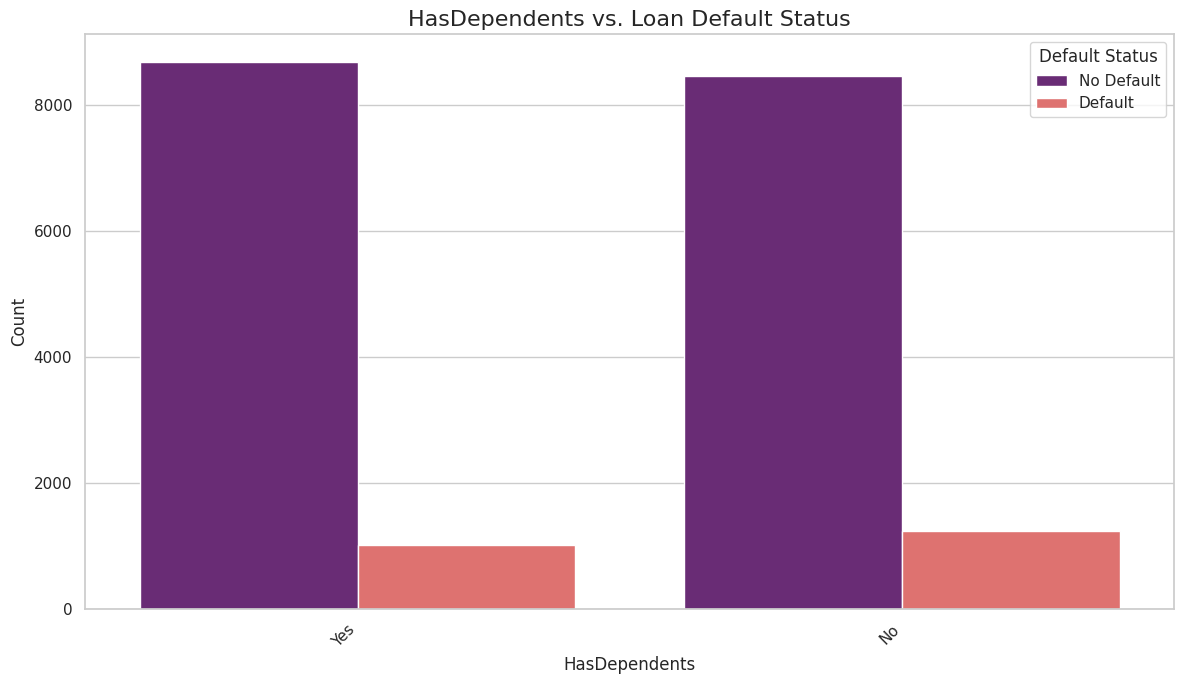

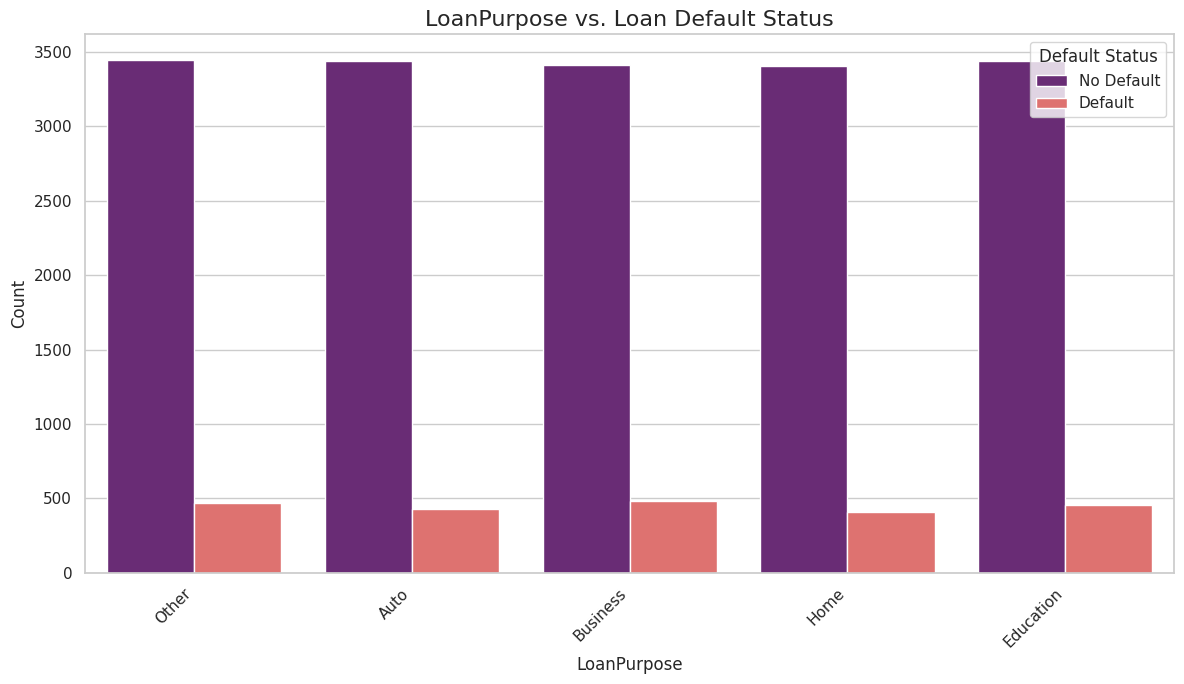

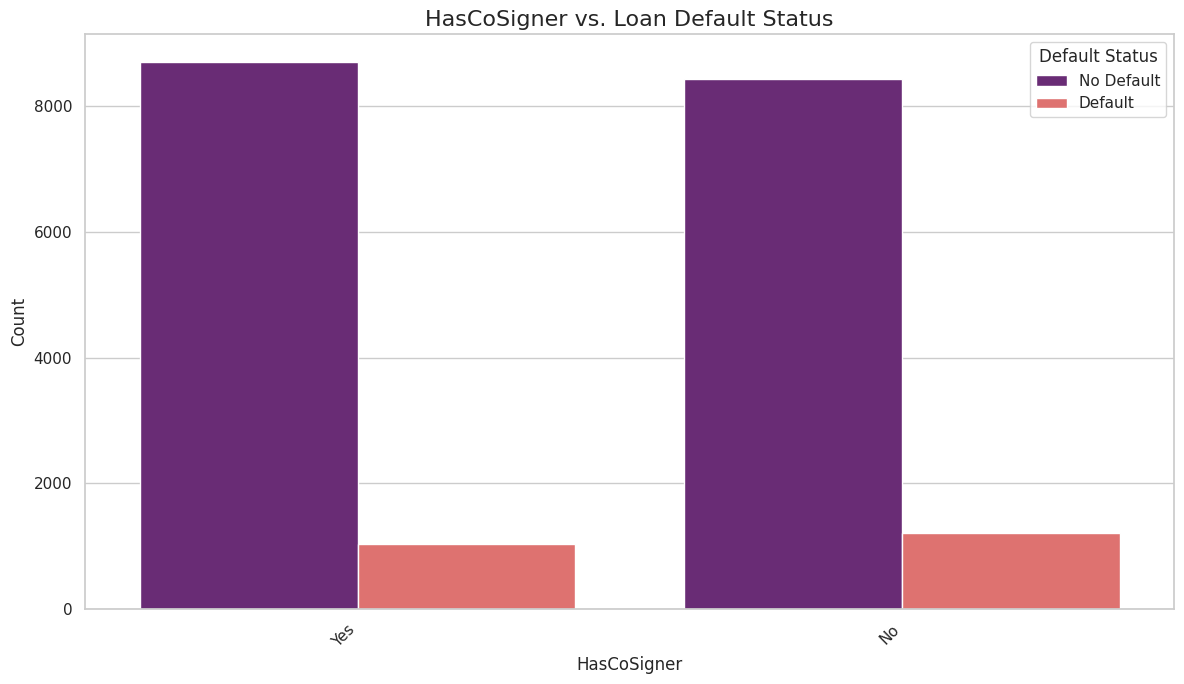

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Get the absolute path to the file
file_path = os.path.abspath('Loan_default.csv')
print(f"Loading data from: {file_path}")

df = pd.read_csv(file_path)
print("Data loaded successfully.")

# Set the style for the plots
sns.set(style='whitegrid', palette='pastel', color_codes=True)

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Default', data=df, palette='viridis')
plt.title('Distribution of Loan Default Status', fontsize=16)
plt.xlabel('Default Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# Separate the DataFrame for defaulters and non-defaulters
defaulters = df[df['Default'] == 1]
non_defaulters = df[df['Default'] == 0]

# Visualize the distribution of numerical features for both classes
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'DTIRatio']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(non_defaulters[feature], color='green', label='No Default', kde=True, bins=30)
    sns.histplot(defaulters[feature], color='red', label='Default', kde=True, bins=30)
    plt.title(f'Distribution of {feature} by Default Status', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.show()

# Visualize the relationship between categorical features and the target variable
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
for feature in categorical_features:
    plt.figure(figsize=(12, 7))
    sns.countplot(x=feature, hue='Default', data=df, palette='magma')
    plt.title(f'{feature} vs. Loan Default Status', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Default Status', labels=['No Default', 'Default'])
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate target variable
X = df.drop(['LoanID', 'Default', 'Loan Date (DD/MM/YYYY)'], axis=1)
y = df['Default']

# Identify categorical and numerical features
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete. The data is now ready for model training.")

Data preprocessing complete. The data is now ready for model training.


Accuracy: 0.8858
Precision: 0.6088
Recall: 0.0327
F1-score: 0.0621


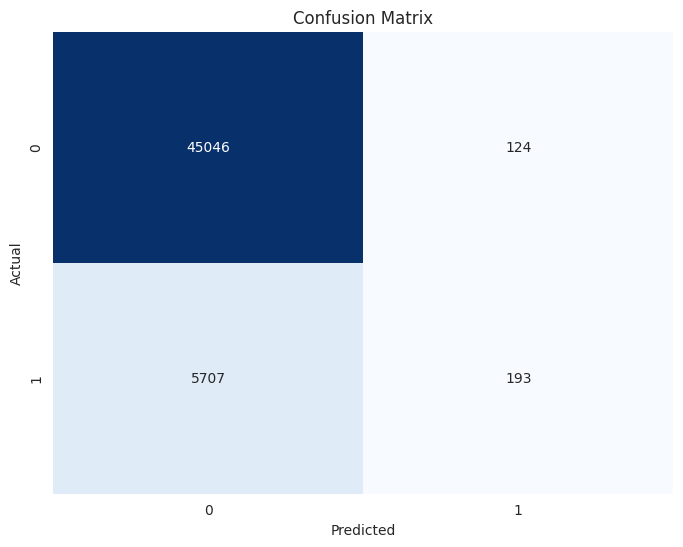

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a pipeline that combines the preprocessor with a classifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after SMOTE:
Default
0    180524
1    180524
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Create a dictionary of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for name, model in models.items():
    # Create a pipeline with just the classifier
    pipeline = Pipeline(steps=[('classifier', model)])

    # Train the model on the resampled data
    pipeline.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set (which has been transformed by the preprocessor)
    y_pred = pipeline.predict(preprocessor.transform(X_test))

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\n")

--- Logistic Regression ---
Accuracy: 0.6859
Precision: 0.2224
Recall: 0.6886
F1-score: 0.3363


--- Random Forest ---
Accuracy: 0.8805
Precision: 0.4383
Recall: 0.1229
F1-score: 0.1920




/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:44:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
Accuracy: 0.8865
Precision: 0.5510
Recall: 0.0971
F1-score: 0.1651




In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a pipeline with the classifier
pipeline = Pipeline(steps=[('classifier', LogisticRegression(random_state=42, solver='saga', max_iter=1000))])

# Define the parameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score: ", grid_search.best_score_)

Best parameters found:  {'classifier__C': 1, 'classifier__penalty': 'l1'}
Best F1-score:  0.6970327326365021


--- Tuned Logistic Regression ---
Accuracy: 0.6859
Precision: 0.2224
Recall: 0.6883
F1-score: 0.3361


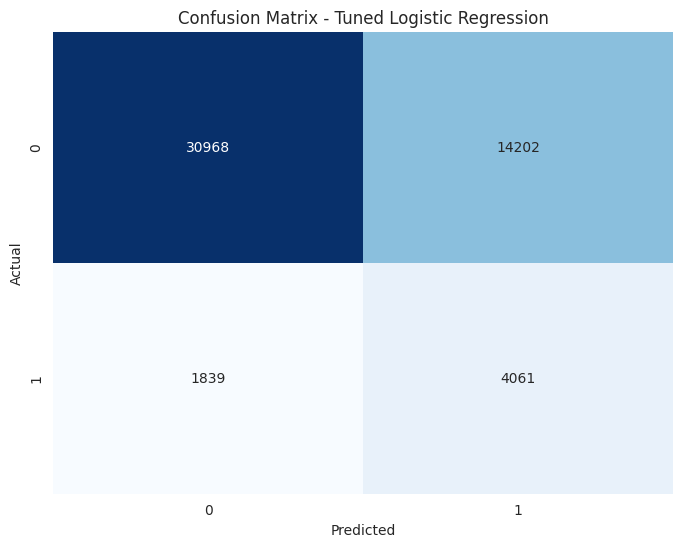

In [ ]:
# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(preprocessor.transform(X_test))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("--- Tuned Logistic Regression ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.show()

In [ ]:
def predict_default(applicant_data):
    """
    Predicts the loan default status for a new applicant.

    Args:
        applicant_data (dict): A dictionary containing the applicant's information.

    Returns:
        str: The prediction ('Default' or 'No Default').
    """

    # Convert the applicant data to a DataFrame
    applicant_df = pd.DataFrame([applicant_data])

    # Preprocess the applicant data
    applicant_preprocessed = preprocessor.transform(applicant_df)

    # Make a prediction
    prediction = best_model.predict(applicant_preprocessed)

    # Return the prediction
    if prediction[0] == 1:
        return 'Default'
    else:
        return 'No Default'

# Create a sample applicant
sample_applicant = {
    'Age': 35,
    'Income': 50000,
    'LoanAmount': 100000,
    'CreditScore': 600,
    'MonthsEmployed': 60,
    'NumCreditLines': 2,
    'InterestRate': 12.0,
    'LoanTerm': 36,
    'DTIRatio': 0.5,
    'Education': 'Bachelor\'s',
    'EmploymentType': 'Full-time',
    'MaritalStatus': 'Married',
    'HasMortgage': 'Yes',
    'HasDependents': 'Yes',
    'LoanPurpose': 'Home',
    'HasCoSigner': 'No'
}

# Make a prediction for the sample applicant
prediction = predict_default(sample_applicant)
print(f"The predicted loan status for the sample applicant is: {prediction}")

The predicted loan status for the sample applicant is: No Default


In [ ]:
# Create a new sample applicant with a higher risk profile
high_risk_applicant = {
    'Age': 25,
    'Income': 25000,
    'LoanAmount': 200000,
    'CreditScore': 400,
    'MonthsEmployed': 12,
    'NumCreditLines': 1,
    'InterestRate': 22.0,
    'LoanTerm': 60,
    'DTIRatio': 0.8,
    'Education': 'High School',
    'EmploymentType': 'Unemployed',
    'MaritalStatus': 'Single',
    'HasMortgage': 'No',
    'HasDependents': 'No',
    'LoanPurpose': 'Other',
    'HasCoSigner': 'No'
}

# Make a prediction for the high-risk applicant
prediction = predict_default(high_risk_applicant)
print(f"The predicted loan status for the high-risk applicant is: {prediction}")

The predicted loan status for the high-risk applicant is: Default
